In [1]:
# installing basic python3 library
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six


alabaster==0.7.12
altair==4.1.0
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anaconda-project==0.8.3
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1596828585465/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.2
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work
Babel @ file:///tmp/build/80754af9/babel_1605108370292/work
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt @ file:///C:/ci/bcrypt_1597936263757/work
beautifulsoup4 @ file:///tmp/build/80754af9/beautifulsoup4_1601924105527/work
bitarray @ file:///C:/ci/bitarray_1605065210072/work
bkcharts==0.2
bleach @ file:///tmp/build/80754af9/bleach_1600439572647/work
bokeh @ file:///C:/ci/bokeh_1603297934731/work
boto==2

In [6]:
import pandas as pd 
df_world = pd.read_csv('owid-covid-data.csv', index_col = 0) # Read the csv file 
df_world.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [7]:
df_world.shape

(99356, 59)

In [8]:
# df is Canadian covid data
df = df_world.loc[["CAN"], ["date", "new_cases", "new_deaths_per_million", "icu_patients_per_million", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "stringency_index"]]
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,new_cases,new_deaths_per_million,icu_patients_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index
iso_code,,,,,,,
CAN,2020-01-26,1.0,NaN,NaN,NaN,NaN,2.78
CAN,2020-01-27,0.0,NaN,NaN,NaN,NaN,2.78
CAN,2020-01-28,1.0,NaN,NaN,NaN,NaN,2.78
CAN,2020-01-29,0.0,NaN,NaN,NaN,NaN,2.78
CAN,2020-01-30,0.0,NaN,NaN,NaN,NaN,2.78


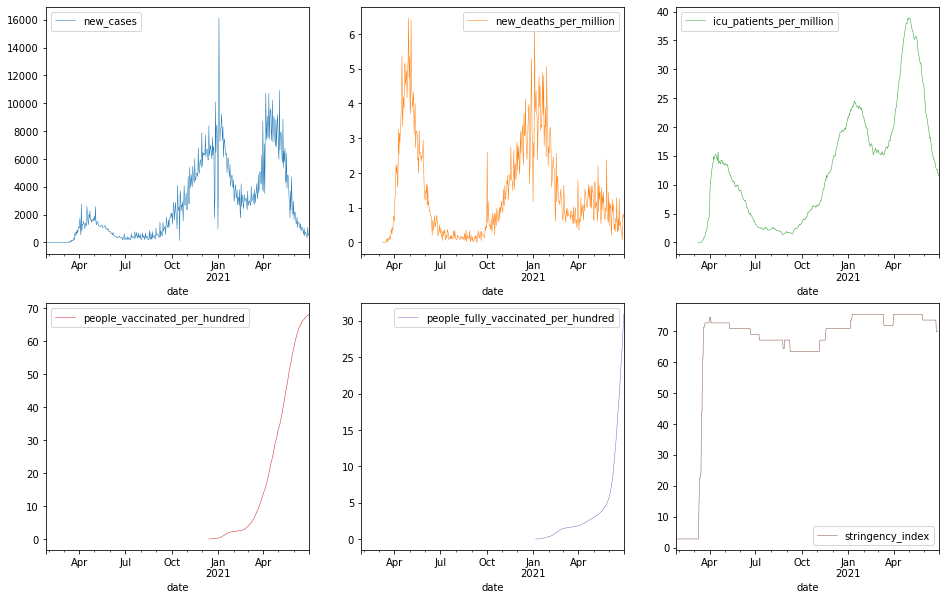

In [9]:
#Visualilze df
import matplotlib.pyplot as plt
df = df.set_index('date')
df.head()
ax = df.plot(subplots=True,
            linewidth=0.5,
            layout=(2,3),
            figsize=(16,10),
            sharex=False,
            sharey=False)
plt.show()


In [20]:
df.shape

(522, 6)

In [42]:
import seaborn as sns

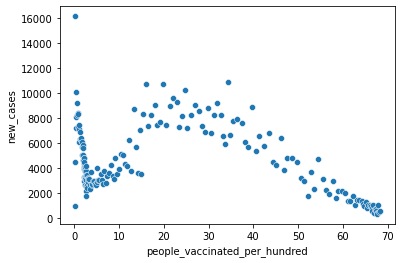

In [47]:
# Correlation between vaccination rate and infection rate
df_vaccination = df['2021-01-01':]
sns.scatterplot(x='people_vaccinated_per_hundred', y='new_cases', data = df_vaccination)
#plt.scatter(df_vaccination["people_vaccinated_per_hundred"],df_vaccination["new_cases"])
plt.show()

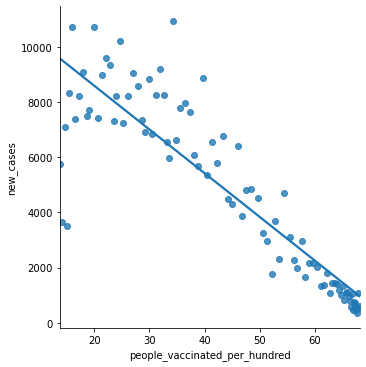

In [52]:
df_vaccination = df['2021-04-01':]
sns.lmplot(x='people_vaccinated_per_hundred', y='new_cases', data = df_vaccination, ci=None)
plt.show()

In [53]:
correlation = df_vaccination["people_vaccinated_per_hundred"].corr(df_vaccination["new_cases"])
print(correlation)

-0.8866526241422304


In [54]:
df_vaccination.head()

,new_cases,new_deaths_per_million,icu_patients_per_million,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index
date,,,,,,
2021-04-01,5741.0,1.007,20.057,13.78,1.84,75.46
2021-04-02,3659.0,0.344,20.296,14.19,1.86,75.46
2021-04-03,7088.0,0.715,21.223,14.71,1.87,75.46
2021-04-04,3512.0,0.583,22.071,15.02,1.87,75.46
2021-04-05,8322.0,0.609,23.131,15.47,1.90,75.46


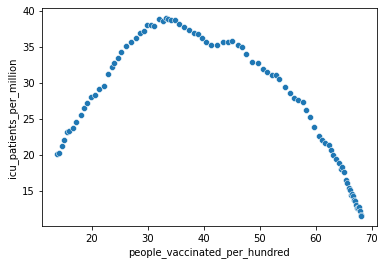

In [55]:
# Correlation between vaccination rate and ICU rate
sns.scatterplot(x='people_vaccinated_per_hundred', y='icu_patients_per_million', data = df_vaccination)
plt.show()

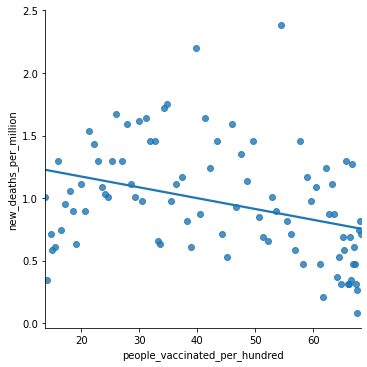

In [59]:
# Correlation between vaccination rate and death rate
sns.lmplot(x='people_vaccinated_per_hundred', y='new_deaths_per_million', data = df_vaccination, ci=None)
plt.show()

In [57]:
correlation2 = df_vaccination["people_vaccinated_per_hundred"].corr(df_vaccination["new_deaths_per_million"])
print(correlation2)

-0.34954371464703093


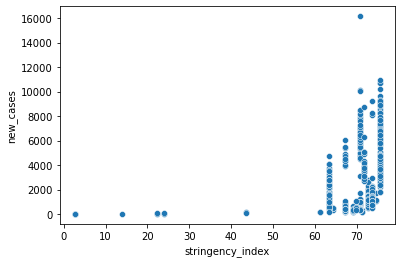

In [61]:
# Correlation between government response and infection rate
sns.scatterplot(x='stringency_index', y='new_cases', data = df)
plt.show()


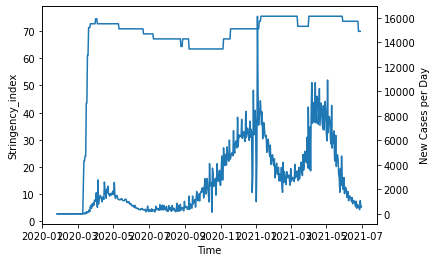

In [62]:
fig, ax = plt.subplots()
ax.plot(df.index, df['stringency_index'])
ax.set_xlabel('Time')
ax.set_ylabel('Stringency_index')
ax2 = ax.twinx()
ax2.plot(df.index, df['new_cases'])
ax2.set_ylabel('New Cases per Day')
plt.show()

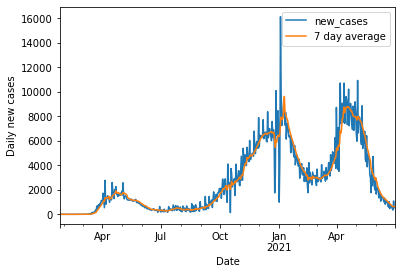

In [40]:
df_newcases = df.loc[:, ["new_cases"]]
df_newcases['7 day average'] = df_newcases.new_cases.rolling(window='7D').mean()
ax = df_newcases.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Daily new cases')
plt.show()

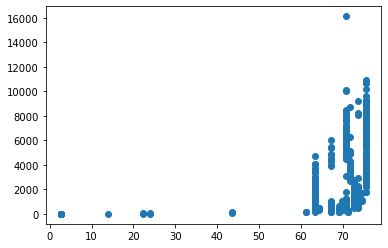

In [14]:
plt.scatter(df["stringency_index"], df["new_cases"])
plt.show()